In [ ]:

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
import csv

In [ ]:
# ------------------------------------------------------------------------
# (A) Dataset
# ------------------------------------------------------------------------
df = pd.read_excel("/content/20210421_PARIS_ENCODED.xlsx", na_values=None)
print(df.describe())


        Unnamed: 0    ordinalDate  ...  literatureCharCount  provenanceCharCount
count  8431.000000    8431.000000  ...          8431.000000          8431.000000
mean   4215.000000  736197.226901  ...            25.167714            23.340173
std    2433.964393    1380.600936  ...            90.462345            55.073347
min       0.000000  732841.000000  ...             0.000000             0.000000
25%    2107.500000  735675.000000  ...             0.000000             0.000000
50%    4215.000000  736997.000000  ...             0.000000             0.000000
75%    6322.500000  737039.000000  ...             0.000000            23.000000
max    8430.000000  737403.000000  ...           899.000000           884.000000

[8 rows x 24 columns]


In [ ]:
# (2) drop rows with missing lotSold
# - this would automatically remove all rows with 'postProcessedAuctionSaleTotalInUSD == 0' as well,
#   because 'postProcessedAuctionSaleTotalInUSD' is the summation of lotSoldInUSD within an auction.
df.drop(df.index[df['lotSoldInUsd'].isna()], inplace=True)
print(df['lotSoldInUsd'].describe())

df.drop(df.index[df['monthlyInflation'].isna()], inplace=True) # otherwise => Loss value = NaN when training
df.drop(df.index[df['auctionLotAmount'].isna()], inplace=True) # otherwise => Loss value = NaN when training
df.drop(df.index[df['postProcessedAuctionSaleTotalInUSD'].isna()], inplace=True) # otherwise => Loss value = NaN when training
df.drop(df.index[df['lowerBoundInUsd'].isna()], inplace=True) # otherwise => Loss value = NaN when training
df.drop(df.index[df['upperBoundInUsd'].isna()], inplace=True) # otherwise => Loss value = NaN when training
print(df)

count    7.173000e+03
mean     4.020723e+04
std      2.723328e+05
min      7.060410e+01
25%      3.526562e+03
50%      7.906937e+03
75%      2.263600e+04
max      1.905363e+07
Name: lotSoldInUsd, dtype: float64
      Unnamed: 0  ...                              saleroomNoticeContent
137          137  ...                                                NaN
138          138  ...                                                NaN
139          139  ...                                                NaN
140          140  ...                                                NaN
141          141  ...                                                NaN
...          ...  ...                                                ...
8425        8425  ...                                                NaN
8426        8426  ...                                                NaN
8427        8427  ...  178\nMerci de noter qu'il y a à certains endro...
8428        8428  ...                                      

In [ ]:
# (3) splitting dataset into training data versus testing data
# n_train = 400
# df_num_row = df.shape[0]
# odd_idx = [idx for idx in range(len(df_num_row)) if idx % 2 == 1]
# even_idx = [idx for idx in range(len(df_num_row)) if idx % 2 == 0]

X_cols = [
    'ordinalDate', 
    'isJan', 'isFeb', 'isMar', 'isApr', 'isMay', 'isJun', 'isJul', 'isAug', 'isSep', 'isOct', 'isNov', 'isDec',
    # 'is2000', 'is2001', 'is2002', 'is2003', 'is2004', 'is2005', 'is2006', 'is2007', 'is2008', 'is2009', 'is2010', 'is2011', 'is2012', 'is2013', 'is2014', 'is2015', 'is2016', 'is2017', 'is2018', 'is2019', 'is2020', 'is2021', 
    # 'isUS', 'isUK', 'isCN', 'isFR', 'isNL', 'isIT',
    'monthlyInflation',
    'auctionLotAmount', 
    # 'is8am', 'is9am', 'is10am', 'is11am', 'is12pm', 'is1pm', 'is2pm', 'is3pm', 'is4pm', 'is5pm', 'is6pm', 'is7pm',
    'backupDescriptionCharCount',
    'detailedDescriptionCharCount',
    'IsFieldExist__CatalogueNote', 'CharCount__CatalogueNote', 'LangCount__CatalogueNote',
    'postProcessedAuctionSaleTotalInUSD',
    'lowerBoundInUsd', 'upperBoundInUsd',
    'isExhibitedExist',
    'literatureCharCount', 
    'isProvenanceExist','provenanceCharCount', 
    'isPropertyDetailsExist',
    'isSubtitleExist', 
    'isSaleroomNoticeExist'
]
y_col = ['lotSoldInUsd']

X_train, X_test, y_train, y_test = train_test_split(df[X_cols], df[y_col], test_size=0.2) 
print(X_train)
print(X_test)
print(y_train)
print(y_test)

# print(df.describe())

      ordinalDate  isJan  ...  isSubtitleExist  isSaleroomNoticeExist
6342       735640  False  ...             True                  False
6639       735031  False  ...             True                  False
8405       732841  False  ...             True                  False
4811       736857  False  ...             True                  False
6292       735759  False  ...             True                  False
...           ...    ...  ...              ...                    ...
2599       736997  False  ...            False                  False
1644       737166  False  ...            False                  False
3210       736997  False  ...            False                  False
1581       737166  False  ...             True                  False
2347       736997  False  ...            False                  False

[5649 rows x 30 columns]
      ordinalDate  isJan  ...  isSubtitleExist  isSaleroomNoticeExist
3767       736997  False  ...            False                  

In [ ]:
# (4a - df directly) data scaling: scale numeric data
# - shd be before one-hot encoding as that converts boolean columns into numeric columns.
# scaler = MinMaxScaler()
# numeric_cols = df.columns[df.dtypes.apply(lambda col: np.issubdtype(col, np.number))]
# df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# (4b - train & test) data scaling: scale numeric data
# - shd be before one-hot encoding as that converts boolean columns into numeric columns.
# scaler = MinMaxScaler()
scaler = RobustScaler()
numeric_cols = X_train.columns[X_train.dtypes.apply(lambda col: np.issubdtype(col, np.number))]
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
# X_test[numeric_cols] = scaler.fit_transform(X_test[numeric_cols])

y_train = scaler.fit_transform(y_train)
# y_test = scaler.fit_transform(y_test)

print(X_train)
print(y_train)

      ordinalDate  isJan  ...  isSubtitleExist  isSaleroomNoticeExist
6342    -1.492849  False  ...             True                  False
6639    -2.162816  False  ...             True                  False
8405    -4.572057  False  ...             True                  False
4811    -0.154015  False  ...             True                  False
6292    -1.361936  False  ...             True                  False
...           ...    ...  ...              ...                    ...
2599     0.000000  False  ...            False                  False
1644     0.185919  False  ...            False                  False
3210     0.000000  False  ...            False                  False
1581     0.185919  False  ...             True                  False
2347     0.000000  False  ...            False                  False

[5649 rows x 30 columns]
[[ 0.62133442]
 [-0.06263859]
 [ 2.90633743]
 ...
 [ 0.47888214]
 [-0.11286863]
 [ 2.17338818]]


In [ ]:
# (5a - df directly) one-hot encoding: convert boolean into 0/1
# for column in df.columns:
#     if df[column].dtypes == 'bool':
#         df[column] = df[column] * 1
#         print("[*] Boolean column '{0}' has been converted into 0 & 1".format(column))

# (5b - train & test) one-hot encoding: convert boolean into 0/1
for column in X_train.columns:
    if X_train[column].dtypes == 'bool':
        X_train[column] = X_train[column] * 1
        X_test[column] = X_test[column] * 1
        print("[*] Boolean column '{0}' has been converted into 0 & 1".format(column))

[*] Boolean column 'isJan' has been converted into 0 & 1
[*] Boolean column 'isFeb' has been converted into 0 & 1
[*] Boolean column 'isMar' has been converted into 0 & 1
[*] Boolean column 'isApr' has been converted into 0 & 1
[*] Boolean column 'isMay' has been converted into 0 & 1
[*] Boolean column 'isJun' has been converted into 0 & 1
[*] Boolean column 'isJul' has been converted into 0 & 1
[*] Boolean column 'isAug' has been converted into 0 & 1
[*] Boolean column 'isSep' has been converted into 0 & 1
[*] Boolean column 'isOct' has been converted into 0 & 1
[*] Boolean column 'isNov' has been converted into 0 & 1
[*] Boolean column 'isDec' has been converted into 0 & 1
[*] Boolean column 'IsFieldExist__CatalogueNote' has been converted into 0 & 1
[*] Boolean column 'isExhibitedExist' has been converted into 0 & 1
[*] Boolean column 'isProvenanceExist' has been converted into 0 & 1
[*] Boolean column 'isPropertyDetailsExist' has been converted into 0 & 1
[*] Boolean column 'isSubt

In [ ]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

      ordinalDate  isJan  ...  isSubtitleExist  isSaleroomNoticeExist
6342    -1.492849      0  ...                1                      0
6639    -2.162816      0  ...                1                      0
8405    -4.572057      0  ...                1                      0
4811    -0.154015      0  ...                1                      0
6292    -1.361936      0  ...                1                      0
...           ...    ...  ...              ...                    ...
2599     0.000000      0  ...                0                      0
1644     0.185919      0  ...                0                      0
3210     0.000000      0  ...                0                      0
1581     0.185919      0  ...                1                      0
2347     0.000000      0  ...                0                      0

[5649 rows x 30 columns]
      ordinalDate  isJan  ...  isSubtitleExist  isSaleroomNoticeExist
3767       736997      0  ...                0                  

Epoch 1/50
283/283 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 2/50
283/283 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 3/50
283/283 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 4/50
283/283 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 5/50
283/283 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 6/50
283/283 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 7/50
283/283 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 8/50
283/283 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 9/50
283/283 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 10/50
283/283 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 11/50
283/283 [==============================] - 0s 1

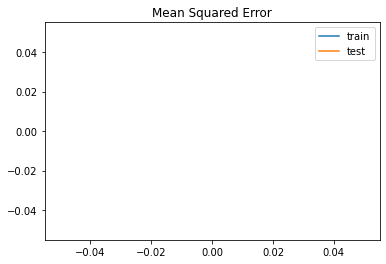

In [ ]:
# EXP 001 - Mini-Batch Gradient Descent + 1 Hidden Layer

from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD, Adam, Adamax, Nadam, Ftrl
from keras.utils import plot_model
from matplotlib import pyplot

num_epochs = 50

model = Sequential()
model.add(Dense(len(X_cols), input_dim=len(X_cols), activation='relu', kernel_initializer='he_uniform')) # number of nodes = number of features
model.add(Dense(1, activation='linear'))

# pick one optimizer from below
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01)) # SGD

plot_model(model, to_file='/content/model_1_1.png', show_shapes=True)

X_train_v2 = np.asarray(X_train).astype(np.float32)
y_train_v2 = np.asarray(y_train).astype(np.float32)
X_test_v2 = np.asarray(X_test).astype(np.float32)
y_test_v2 = np.asarray(y_test).astype(np.float32)

history = model.fit(
    X_train_v2, 
    y_train_v2, 
    validation_data=(X_test_v2, y_test_v2),
    epochs=num_epochs, 
    verbose=1,
    batch_size=20
)

mse_train = model.evaluate(X_train_v2, y_train_v2, verbose=1)
mse_test = model.evaluate(X_test_v2, y_test_v2, verbose=1)

model.predict(X_test_v2)

model.summary()

pyplot.title('Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

Epoch 1/50
283/283 [==============================] - 3s 9ms/step - loss: 264.3548 - val_loss: 18273019904.0000
Epoch 2/50
283/283 [==============================] - 2s 9ms/step - loss: 388.4214 - val_loss: 18273007616.0000
Epoch 3/50
283/283 [==============================] - 2s 8ms/step - loss: 552.3590 - val_loss: 18273028096.0000
Epoch 4/50
283/283 [==============================] - 2s 9ms/step - loss: 107.7987 - val_loss: 18273009664.0000
Epoch 5/50
283/283 [==============================] - 2s 9ms/step - loss: 151.6110 - val_loss: 18272991232.0000
Epoch 6/50
283/283 [==============================] - 2s 8ms/step - loss: 238.6589 - val_loss: 18273011712.0000
Epoch 7/50
283/283 [==============================] - 2s 9ms/step - loss: 610.8362 - val_loss: 18273011712.0000
Epoch 8/50
283/283 [==============================] - 2s 8ms/step - loss: 125.2169 - val_loss: 18272989184.0000
Epoch 9/50
283/283 [==============================] - 2s 8ms/step - loss: 139.5231 - val_loss: 182730055

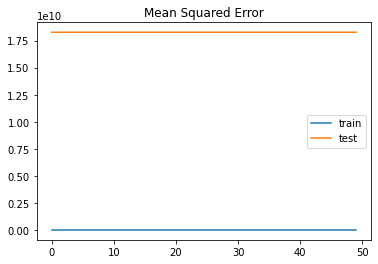

In [ ]:
# EXP 002 - Mini-Batch Gradient Descent + 10 Hidden Layers

from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD, Adam, Adamax, Nadam, Ftrl
from keras.utils import plot_model
from matplotlib import pyplot

num_epochs = 50

model = Sequential()
model.add(Dense(1024, input_dim=len(X_cols), activation='relu', kernel_initializer='he_uniform')) # number of nodes = number of features
model.add(Dense(512, input_dim=1024, activation='relu', kernel_initializer='he_uniform')) # number of nodes = number of features
model.add(Dense(256, input_dim=512, activation='relu', kernel_initializer='he_uniform')) # number of nodes = number of features
model.add(Dense(128, input_dim=256, activation='relu', kernel_initializer='he_uniform')) # number of nodes = number of features
model.add(Dense(64, input_dim=128, activation='relu', kernel_initializer='he_uniform')) # number of nodes = number of features
model.add(Dense(32, input_dim=64, activation='relu', kernel_initializer='he_uniform')) # number of nodes = number of features
model.add(Dense(16, input_dim=32, activation='relu', kernel_initializer='he_uniform')) # number of nodes = number of features
model.add(Dense(8, input_dim=16, activation='relu', kernel_initializer='he_uniform')) # number of nodes = number of features
model.add(Dense(4, input_dim=8, activation='relu', kernel_initializer='he_uniform')) # number of nodes = number of features
model.add(Dense(2, input_dim=4, activation='relu', kernel_initializer='he_uniform')) # number of nodes = number of features
model.add(Dense(1, activation='linear'))

# pick one optimizer from below
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01)) # SGD

plot_model(model, to_file='/content/model_1.png', show_shapes=True)

X_train_v2 = np.asarray(X_train).astype(np.float32)
y_train_v2 = np.asarray(y_train).astype(np.float32)
X_test_v2 = np.asarray(X_test).astype(np.float32)
y_test_v2 = np.asarray(y_test).astype(np.float32)

history = model.fit(
    X_train_v2, 
    y_train_v2, 
    validation_data=(X_test_v2, y_test_v2),
    epochs=num_epochs, 
    verbose=1,
    batch_size=20
)

mse_train = model.evaluate(X_train_v2, y_train_v2, verbose=1)
mse_test = model.evaluate(X_test_v2, y_test_v2, verbose=1)

model.predict(X_test_v2)

model.summary()

pyplot.title('Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

Epoch 1/50
177/177 [==============================] - 1s 2ms/step - loss: 3000.8450 - val_loss: 161985916305408.0000
Epoch 2/50
177/177 [==============================] - 0s 2ms/step - loss: 285.2825 - val_loss: 501638255083520.0000
Epoch 3/50
177/177 [==============================] - 0s 2ms/step - loss: 482.3273 - val_loss: 733791605751808.0000
Epoch 4/50
177/177 [==============================] - 0s 2ms/step - loss: 486.5195 - val_loss: 1134136177721344.0000
Epoch 5/50
177/177 [==============================] - 0s 2ms/step - loss: 811.5461 - val_loss: 1612564395982848.0000
Epoch 6/50
177/177 [==============================] - 0s 2ms/step - loss: 176.6481 - val_loss: 1866480312385536.0000
Epoch 7/50
177/177 [==============================] - 0s 2ms/step - loss: 282.2430 - val_loss: 2373395706544128.0000
Epoch 8/50
177/177 [==============================] - 0s 2ms/step - loss: 647.8962 - val_loss: 2553861105516544.0000
Epoch 9/50
177/177 [==============================] - 0s 2ms/step 

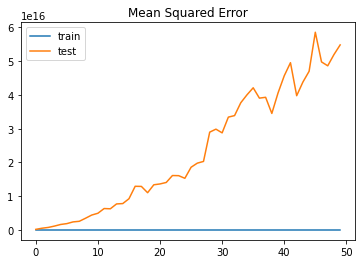

In [ ]:
# EXP 003 - Adam + 1 Hidden Layer

from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD, Adam, Adamax, Nadam, Ftrl
from keras.utils import plot_model
from matplotlib import pyplot

num_epochs = 50

model = Sequential()
model.add(Dense(len(X_cols), input_dim=len(X_cols), activation='relu', kernel_initializer='he_uniform')) # number of nodes = number of features
model.add(Dense(1, activation='linear'))

# pick one optimizer from below
model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.01)) # Adam

plot_model(model, to_file='/content/model_2.png', show_shapes=True)

X_train_v2 = np.asarray(X_train).astype(np.float32)
y_train_v2 = np.asarray(y_train).astype(np.float32)
X_test_v2 = np.asarray(X_test).astype(np.float32)
y_test_v2 = np.asarray(y_test).astype(np.float32)

history = model.fit(
    X_train_v2, 
    y_train_v2, 
    validation_data=(X_test_v2, y_test_v2),
    epochs=num_epochs, 
    verbose=1,
)

mse_train = model.evaluate(X_train_v2, y_train_v2, verbose=1)
mse_test = model.evaluate(X_test_v2, y_test_v2, verbose=1)

model.predict(X_test_v2)

model.summary()

pyplot.title('Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

Epoch 1/50
177/177 [==============================] - 3s 15ms/step - loss: 1912.4617 - val_loss: 18273079296.0000
Epoch 2/50
177/177 [==============================] - 2s 14ms/step - loss: 144.6133 - val_loss: 18273034240.0000
Epoch 3/50
177/177 [==============================] - 2s 14ms/step - loss: 233.7934 - val_loss: 18273017856.0000
Epoch 4/50
177/177 [==============================] - 2s 14ms/step - loss: 378.3855 - val_loss: 18273011712.0000
Epoch 5/50
177/177 [==============================] - 2s 14ms/step - loss: 326.3635 - val_loss: 18273011712.0000
Epoch 6/50
177/177 [==============================] - 2s 14ms/step - loss: 505.7330 - val_loss: 18273011712.0000
Epoch 7/50
177/177 [==============================] - 2s 14ms/step - loss: 158.4224 - val_loss: 18273001472.0000
Epoch 8/50
177/177 [==============================] - 2s 14ms/step - loss: 55.7872 - val_loss: 18273011712.0000
Epoch 9/50
177/177 [==============================] - 2s 14ms/step - loss: 195.0423 - val_loss: 

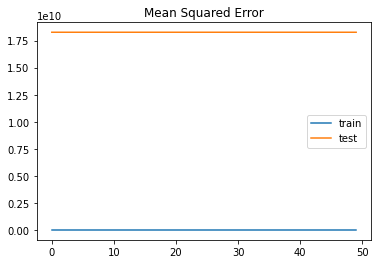

In [ ]:
# EXP 004 - Adam + 10 Hidden Layer

from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD, Adam, Adamax, Nadam, Ftrl
from keras.utils import plot_model
from matplotlib import pyplot

num_epochs = 50

model = Sequential()
model.add(Dense(1024, input_dim=len(X_cols), activation='relu', kernel_initializer='he_uniform')) # number of nodes = number of features
model.add(Dense(512, input_dim=1024, activation='relu', kernel_initializer='he_uniform')) # number of nodes = number of features
model.add(Dense(256, input_dim=512, activation='relu', kernel_initializer='he_uniform')) # number of nodes = number of features
model.add(Dense(128, input_dim=256, activation='relu', kernel_initializer='he_uniform')) # number of nodes = number of features
model.add(Dense(64, input_dim=128, activation='relu', kernel_initializer='he_uniform')) # number of nodes = number of features
model.add(Dense(32, input_dim=64, activation='relu', kernel_initializer='he_uniform')) # number of nodes = number of features
model.add(Dense(16, input_dim=32, activation='relu', kernel_initializer='he_uniform')) # number of nodes = number of features
model.add(Dense(8, input_dim=16, activation='relu', kernel_initializer='he_uniform')) # number of nodes = number of features
model.add(Dense(4, input_dim=8, activation='relu', kernel_initializer='he_uniform')) # number of nodes = number of features
model.add(Dense(2, input_dim=4, activation='relu', kernel_initializer='he_uniform')) # number of nodes = number of features
model.add(Dense(1, activation='linear'))

# pick one optimizer from below
model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.01)) # Adam

plot_model(model, to_file='/content/model_2.png', show_shapes=True)

X_train_v2 = np.asarray(X_train).astype(np.float32)
y_train_v2 = np.asarray(y_train).astype(np.float32)
X_test_v2 = np.asarray(X_test).astype(np.float32)
y_test_v2 = np.asarray(y_test).astype(np.float32)

history = model.fit(
    X_train_v2, 
    y_train_v2, 
    validation_data=(X_test_v2, y_test_v2),
    epochs=num_epochs, 
    verbose=1,
)

mse_train = model.evaluate(X_train_v2, y_train_v2, verbose=1)
mse_test = model.evaluate(X_test_v2, y_test_v2, verbose=1)

model.predict(X_test_v2)

model.summary()

pyplot.title('Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()